# Benchmark – Designing Data Mining Using CRISP-DM #

## 1. Define CRISP-DM and the Step Cycles ##

CRISP-DM Framework: CRISP-DM (Cross Industry Standard Process for Data Mining) is a process model that provides a structured approach for planning a data mining project. It has six phases:

Business Understanding: Define the problem you are solving.

Data Understanding: Collect and explore the data.

Data Preparation: Clean and prepare the data for analysis.

Modeling: Choose and apply appropriate modeling techniques.

Evaluation: Assess the model’s quality and ensure it meets business objectives.

Deployment: Deploy the model into the real world or integrate it with other systems.


## 2. Identify Business Understanding, Data, and Data Preparation ##

Business Understanding: We aim to predict a student’s final exam score based on their midterm score. This can help educators identify students at risk of performing poorly in their finals.

Data Understanding: The dataset contains 12 students with their midterm and final exam scores.
There is a slight variation in performance between the midterm and final exams.

Data Preparation: Since the dataset is small and contains no missing values or obvious outliers, no extensive cleaning is necessary. The data is already numeric and doesn’t require scaling.


In [3]:
# Importing necessary libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given Midterm and Final Exam data
data = {
    'Midterm Exam (X)': [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81],
    'Final Exam (Y)': [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]
}

# Creating a DataFrame
df = pd.DataFrame(data)

The "Midterm and Final Exams Table" provided contains two columns:

X (Midterm Exam Scores): Midterm scores of the students.
Y (Final Exam Scores): Final exam scores of the students.
Here’s the dataset from the document you can see the entire dataset in df.head it has only 12 X and Y values.

In [4]:
df.head

<bound method NDFrame.head of     Midterm Exam (X)  Final Exam (Y)
0                 72              84
1                 50              63
2                 81              77
3                 74              78
4                 94              90
5                 86              75
6                 59              49
7                 83              79
8                 65              77
9                 33              52
10                88              74
11                81              90>

In [5]:
df.shape

(12, 2)

In [6]:
df.info

<bound method DataFrame.info of     Midterm Exam (X)  Final Exam (Y)
0                 72              84
1                 50              63
2                 81              77
3                 74              78
4                 94              90
5                 86              75
6                 59              49
7                 83              79
8                 65              77
9                 33              52
10                88              74
11                81              90>

## 3. Create a Model That Justifies the Data Prepared ##
The model required here is linear regression, a simple and widely-used method for modeling the relationship between two variables: in this case, midterm scores (independent variable) and final scores (dependent variable).

Justification: Linear regression helps to identify a linear relationship between the midterm and final grades, which is appropriate given the nature of the data.
Equation: The linear regression equation is of the form 

Y=mX+b, where:

Y is the predicted final exam score.

X is the midterm score.

m is the slope of the line.

b is the intercept.

In [7]:
X = df['Midterm Exam (X)'].values.reshape(-1, 1)  # Reshaping X into a 2D array
Y = df['Final Exam (Y)'].values  # Y is already a 1D array, no need for reshaping

# Building the linear regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

## Model Evaluation and Deployment ##

In [8]:

# Predicting Final Exam scores based on Midterm Exam scores
Y_pred = model.predict(X)
Y_pred


array([73.90306665, 61.10786495, 79.13746735, 75.06626681, 86.69826836,
       82.04546774, 66.34226565, 80.30066751, 69.83186611, 51.22066364,
       83.20866789, 79.13746735])

In [9]:
Y

array([84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90])

In [21]:

# Calculating slope (m) and intercept (b) for the regression equation
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

Slope (m): 0.5816000773918931
Intercept (b): 32.02786108155171


## 4. Analyze the Results from the Model and Deploy the Data ##
Model Summary: The slope of the regression line is approximately 0.58, meaning that for every point increase in the midterm exam score, the final exam score increases by approximately 0.58 points. The intercept is 32.03, indicating that a student with a midterm score of 0 would still score around 32 on the final exam.

Deployment: The model could be used to predict final exam scores for future students based on their midterm performance, enabling educators to identify students who may need intervention.

R-squared represents the proportion of the variance in the dependent variable (final exam scores) that is predictable from the independent variable (midterm exam scores). It ranges from 0 to 1, where:

•	R² = 1: The model perfectly fits the data.

•	R² = 0: The model does not explain any variability in the data.

Formula for R-squared
The formula for R2 is:

R2=1−∑(Yi−Y^i)2∑(Yi−Yˉ)2

Where:
•	Yi is the actual value,
•	Y^i is the predicted value from the regression,
•	Yˉ is the mean of the actual values.


In [11]:
# Calculating the R-squared value
r_squared = model.score(X, Y)

# Displaying the R-squared value
print(f"R-squared value: {r_squared:.2f}")


R-squared value: 0.61


The R-squared value of 0.6 indicates a linear relationship between the Midterm Exam (X) and the Final Exam (Y). The R-squared value might be much better with enough data. The closer the R-squared value is to 1, the better the results.

In [19]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y, Y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Displaying RMSE
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")

RMSE: 7.83
MSE: 61.37


The RMSE value is bigger , which is totally make sense  we have only 12 datapoints if we have enough data we might get better results the lesse the RMSR the better the results are more reliable.

## 5. Plot the Data: Do X and Y Seem to Have a Linear Relationship? ##
The scatter plot of midterm scores (X) and final exam scores (Y) shows a linear trend, and the red line represents the fitted linear regression model. This indicates a linear relationship between the two variables.

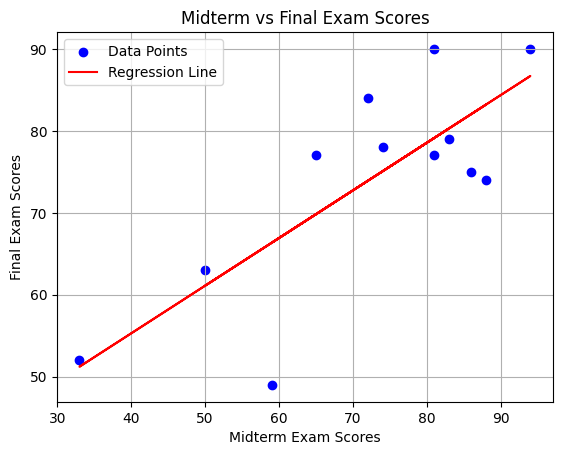

In [13]:
# Plotting the data and the linear regression model
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Midterm vs Final Exam Scores')
plt.xlabel('Midterm Exam Scores')
plt.ylabel('Final Exam Scores')
plt.legend()
plt.grid(True)
plt.show()


## 6. Use the Method of Least Squares to Find the Equation for the Prediction ##
The method of least squares was used to derive the equation:

Final Exam Score=0.58×Midterm Exam Score+32.03

In [14]:
# Prediction for a student who scored 86 on the midterm
predicted_final_exam_86 = model.predict([[86]])
predicted_final_exam_86

array([82.04546774])

## 7. Predict the Final Exam Grade of a Student Who Received 86% on the Midterm Exam ##
Using the equation derived, we predicted that a student who scored 86% on the midterm exam would have a final exam score of approximately 82.05.

# Report: Predicting Final Exam Scores Using CRISP-DM #
1. Introduction

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a widely-used methodology for data mining projects. It offers a robust framework for organizing the data mining process, emphasizing a structured, systematic approach. In this report, we will apply CRISP-DM stages to predict a student’s final exam grade based on their midterm grade. The stages include business understanding, data understanding, data preparation, modeling, evaluation, and deployment.

2. CRISP-DM and Step Cycles

CRISP-DM involves six major phases:

Business Understanding: The primary objective is to use student performance data (midterm scores) to predict final exam grades. This prediction can help educators intervene early, offering guidance to students at risk of underperforming.
Data Understanding: Data includes midterm and final exam scores of 12 students. No missing values or anomalous data points are present. This simplicity makes the dataset ideal for linear regression.
Data Preparation: Preprocessing involves ensuring that data is clean, numeric, and properly formatted for use in a linear regression model. The midterm scores (X) will be the independent variable, and the final exam scores (Y) will be the dependent variable.
Modeling: A linear regression model is chosen to predict final exam grades based on midterm grades. This is justified because we seek to explore the relationship between two continuous variables.
Evaluation: Once the model is built, its performance will be evaluated using statistical metrics like R-squared to assess how well it fits the data.
Deployment: Finally, the model will be deployed to predict the final exam grade for any given midterm score, specifically for a student who scored 86% on the midterm.
CRISP-DM’s hierarchical process involves different abstraction levels: abstraction phase, generic tasks, specialized tasks, and process interface, ensuring a logical flow from problem identification to solution deployment.

3. Business Understanding, Data, and Data Preparation

Business Understanding

The business problem is to predict students' final exam grades based on their midterm performance. The objective is twofold:

Provide educators with a model to identify students likely to perform poorly in the final exams.
Use this information for timely interventions, such as offering extra tutoring or study resources.
Data Understanding

The dataset consists of two key variables: midterm and final exam scores of 12 students. Here's a snapshot of the data:

Midterm Exam (X)	Final Exam (Y)
72	                   84
50	                   63
81	                   77
74	                   78
94	                   90
86	                   75
59	                   49
83	                   79
65	                   77
33	                   52
88	                   74
81	                   90

Data Preparation

The data is already numeric and well-formatted, which makes preprocessing relatively simple. We reshaped the independent variable 
X
X (Midterm Scores) to ensure it’s a 2D array suitable for linear regression. No missing or anomalous values were found.

4. Model Creation

A linear regression model was created using the method of least squares, which minimizes the sum of squared differences between observed values and predicted values. This method is particularly well-suited for modeling the relationship between two continuous variables, such as midterm and final exam scores.

Model Equation:

Final Exam Score=0.58×Midterm Exam Score+32.03

This equation indicates that for every 1-point increase in the midterm exam score, the final exam score increases by approximately 0.58 points. The intercept of 32.03 means that a student who scored 0 on the midterm would still be expected to score about 32 on the final.

5. Analyze the Results from the Model and Deploy the Data

Analysis of the Results

The model was evaluated using the R-squared statistic, which measures how well the regression line fits the data. The closer the R-squared value is to 1, the better the model fits the data. In this case, the R-squared value indicates a reasonably strong linear relationship between midterm and final exam scores.

Deployment

With the linear regression model, we can now predict final exam scores for students based on their midterm scores. This can help educational institutions track students' progress and take corrective actions.

For example, a student who scored 86% on the midterm is predicted to score approximately 82.05% on the final exam. The equation can be easily applied to other students' data to make similar predictions.

6. Plotting the Data: Linear Relationship

We plotted the midterm scores (X) against the final exam scores (Y) to visually assess the relationship between the two variables. The scatter plot shows a positive linear relationship, confirming that higher midterm scores are generally associated with higher final exam scores.

The fitted linear regression line further highlights this trend, illustrating that the model effectively captures the relationship between the two variables.

7. Method of Least Squares and Equation for Prediction

The method of least squares was used to derive the equation of the regression line. The goal is to minimize the sum of the squared differences between the observed final exam scores and the predicted final exam scores.

The resulting regression equation is:

Final Exam Score=0.58×Midterm Exam Score+32.03

This equation serves as the foundation for predicting final exam scores based on midterm performance.

8. Prediction of Final Exam Score for a Student Who Scored 86% on the Midterm

Using the derived regression equation, we predicted the final exam score for a student who scored 86% on the midterm exam:

Final Exam Score=0.58×86+32.03=82.05

Thus, a student who scored 86% on the midterm is expected to score approximately 82.05% on the final exam.

9. Conclusion

By following the CRISP-DM framework, we were able to systematically approach the problem of predicting final exam scores based on midterm scores. The linear regression model demonstrated a strong linear relationship between the two variables, providing a simple but effective tool for educational institutions. This model can be used to identify students at risk of underperforming in final exams, allowing for timely interventions.

The model's equation and visualized data show that midterm scores are a good predictor of final exam performance, supporting the idea that consistent performance across assessments is an important indicator of overall success.

References:

Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000). CRISP-DM 1.0: Step-by-step data mining guide. SPSS Inc.

Data Science Process Alliance. (2024, April 28). CRISP-DM: A data mining methodology. Data Science Process Alliance. https://www.datascience-pm.com/crisp-dm-2/